In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import random
import scipy as sp

### Logistic Map


We considered $N$ logistic maps coupled as:

$x_i(t+1) = (1- \epsilon) f[x_i(t)] + \frac{\epsilon}{b_i} \sum_{j=1}^N \eta_{ij} f[(x_j (t-\tau_{ij})]$ 

$t$: discrete time index

$i$: discrete space index

$f(x) = ax(1-x)$: logistic map equation

$\eta_{ij}$: adjacency matrix

$b_i = \sum_j \eta_{ij}$

$\tau_{ij}$: delay time between the $i$th and $j$th

$\epsilon$: coupling strength

#### Network Connectivity

$\langle b \rangle = \frac{1}{N} \sum_{i=1}^N b_i$

In this case we measured the connectivity in terms of the average degree.

#### Synchronization indicators

$\sigma^2 = \frac{1}{N} \left \langle \sum_i (x_i - \langle x\rangle_s)^2 \right \rangle_t $

$\sigma '^2 = \frac{1}{N} \left \langle \sum_i (x_i - x_0)^2 \right \rangle_t $

In [2]:
class Logistic:
    def __init__(self, epsilon = 0.5, t_0 = int(0), T = int(100), a = 2.5,
                     x0 = 1.3, tau_zero = int(1), n_nodes = None, graph = None):
        '''
        PARAMETERS:
        epsilon: float
        t_0: float
        T:float
           Total time of simulated activity
        n_nodes: int
            Number of logistic maps
        x0: float
            Initial state of the logistic map
        tau_zero: int
            Delay parameter
        graph: networkx graph
        '''
        if n_nodes is None:
            raise ValueError("n_nodes must be specified")
        else:
            self.n_nodes = n_nodes
        self.epsilon = epsilon
        self.t_0 = t_0
        self.T = T
        self.x0 = [x0]
        self.tau_zero = tau_zero
        self.a = a
        if graph is None:
            raise ValueError("graph must be specified")
        else:
            self.G = graph
        
    def logistic(self, x):
        return x*self.a*(1-x)
    
    def adjacency_matrix(self):
        self.M = nx.to_numpy_array(self.G)
        return self.M
    
    def calculate_b(self,index):
        return np.sum(self.M[index])
    
    def Tau_matrix(self):
        self.tau_matrix = []
        c = 2
        for i in range(0,self.n_nodes):
            tau = []
            for j in range(0,self.n_nodes):
                tau.append(int(self.tau_zero + c*np.random.uniform(0,1)))
            self.tau_matrix.append(tau)
        return self.tau_matrix
    
    def interation(self):
        self.M = self.adjacency_matrix()
        self.tau_matrix = self.Tau_matrix()
        self.mapas = {}
        tau_max = max(max(self.tau_matrix))
        for i in range(0,self.n_nodes):
            self.mapas[i] = [(np.random.uniform(0,1))] #Definindo os valores iniciais dos mapas    
        for t in range(1,self.T): #Percorre nos intervalos de tempo
            if t>=tau_max:
                for i in range(0,self.n_nodes): #Percorre em todos os nós
                    x_T = (1-self.epsilon)*self.logistic(self.mapas[i][t-1])
                    soma = []
                    for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                        tau = self.tau_matrix[i][j]
                        soma.append((self.epsilon/self.calculate_b(i))*self.M[i][j]*
                                    self.logistic(self.mapas[j][t-tau])) 
                    x_T = x_T + np.sum(soma)
                    self.mapas[i].append(x_T)
                    
            else: 
                for i in range(0,self.n_nodes): #Percorre em todos os nós
                    x_T = self.logistic(self.mapas[i][t-1])
                    soma = []
                    for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                        tau = self.tau_matrix[i][j]
                        soma.append(0) 
                    x_T = x_T + np.sum(soma)
                    self.mapas[i].append(x_T)
        
        return self.mapas
        
    def run(self):
        return self.interation()
    
    def Sigma(self):
        space_mean = []
        for i in range(self.n_nodes): #Calculando a media espacial 
            space_mean.append(self.mapas[i][self.T-1])
        space_mean = np.mean(space_mean)
        sigma = []
        for i in range(n_nodes): #Somatorio 
            k = (self.mapas[i][self.T-1]-space_mean)**2
            sigma.append(k)
        sigma = sum(sigma)
        return (1/self.n_nodes)*(sigma/self.T) #Retorna a média temporal do somatorio divido por n_nodes
    
    def Sigma_line(self):
        sigma_line = []
        for i in range(n_nodes):
            k = (self.mapas[i][self.T-1]- self.mapas[i][0])**2
            sigma_line.append(k)
        sigma_line = sum(sigma_line)
        return (1/self.n_nodes)*(sigma_line/self.T)
    
    
    def TESTE_cu(self):
        av = []
        for i in range(0,self.n_nodes):
            av.append(np.mean(self.mapas[i]))
        cu = []
        for j in range(0,self.n_nodes):
            cuzin = []
            for i in range(0,self.T):
                cuzin.append((self.mapas[j][i]-av[j])**2)
            cu.append(np.mean(cuzin))
        tes = []
        for i in range(0,len(cu)):
            tes.append(cu[i]/n_nodes)
        return sum(tes)
    def TESTE_cu_line(self):
        cu = []
        for j in range(0,self.n_nodes):
            cuzin = []
            for i in range(0,self.T):
                cuzin.append((self.mapas[j][i]-self.mapas[j][0])**2)
            cu.append(np.mean(cuzin))
        tes = []
        for i in range(0,len(cu)):
            tes.append(cu[i]/n_nodes)
        return sum(tes)

###  Barabasi-Albert

In [3]:
matrix_sigmas = []
matrix_sigmas_line = []
matrix_cu = []
for i in range(20,1,-1):
    print("av_degree:", i)
    N = 40
    av_degree = i
    list_sigmas = []
    list_sigmas_line = []
    list_cu = []
    for j in range(0,100):
        n_nodes = N
        T = 15
        m = int(av_degree/2) 
        G = nx.barabasi_albert_graph(n_nodes,m)
        G.remove_edges_from(nx.selfloop_edges(G))
        log = Logistic(epsilon = 0.01*j, T = T, a = 4, n_nodes = n_nodes,
                       tau_zero = 5, graph = G)
        mapas = log.run()
        list_sigmas.append(log.Sigma())
        list_sigmas_line.append(log.Sigma_line())
        list_cu.append(log.TESTE_cu())
    matrix_sigmas.append(list_sigmas)
    matrix_sigmas_line.append(list_sigmas_line)
    matrix_cu.append(list_cu)

av_degree: 20
av_degree: 19
av_degree: 18
av_degree: 17
av_degree: 16
av_degree: 15
av_degree: 14
av_degree: 13
av_degree: 12
av_degree: 11
av_degree: 10
av_degree: 9
av_degree: 8
av_degree: 7
av_degree: 6
av_degree: 5
av_degree: 4
av_degree: 3
av_degree: 2


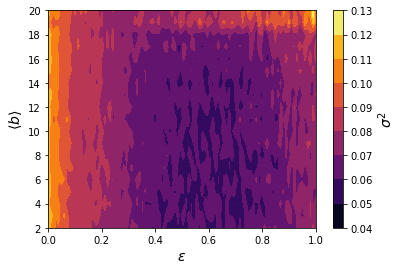

In [4]:
epsilon_values = np.linspace(0,1,100)
b_values = np.linspace(2,20,19)
CS = plt.contourf(epsilon_values,b_values,matrix_cu, cmap = "inferno") #O eixo y ta trocado, é pra ser de 20 ate 2 
                                                                           #e nao de 2 ate 20.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel(r"$\sigma^2$", fontsize = 14)
plt.xlabel(r"$\varepsilon$", fontsize = 14)
plt.ylabel(r'$\langle b \rangle$', fontsize = 14)
# plt.savefig('sigma_WS_200nodes_blues.png', dpi = 150, bbox_inches = 'tight')
plt.show()

### LFR

In [ ]:
matrix_sigmas = []
matrix_sigmas_line = []
matrix_cu = []
for i in range(0,100):
    print("Mu:", 0.01*i)
    N = 120  #Number of nodes in the created graph.
    gam = 3  #Power law exponent for the degree distribution of the created graph
    bet = 1.5 #Power law exponent for the community size distribution in the created graph
    mu = 0.01*i #Fraction of inter-community edges incident to each node
    list_sigmas = []
    list_sigmas_line = []
    list_cu = []
    G = nx.LFR_benchmark_graph(N, tau1=gam, tau2=bet, mu=mu, average_degree=6,max_degree=10,
                                   min_community=30,max_community=30)
    G.remove_edges_from(nx.selfloop_edges(G))
    for j in range(0,100):
        T = 10
        n_nodes = N
        log = Logistic(epsilon = 0.01*j, T = T, a = 4, n_nodes = n_nodes,
                       tau_zero = 5, graph = G)
        mapas = log.run()
        list_cu.append(log.TESTE_cu())
    matrix_cu.append(list_cu)

Mu: 0.0
Mu: 0.01
Mu: 0.02


In [ ]:
epsilon_values = np.linspace(0,1,100)
mu_values = np.linspace(0,1,100)
CS = plt.contourf(epsilon_values,mu_values,matrix_cu, cmap = "Blues") #O eixo y ta trocado, é pra ser de 20 ate 2 
                                                                           #e nao de 2 ate 20.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel(r"$\sigma^2$", fontsize = 14)
plt.xlabel(r"$\varepsilon$", fontsize = 14)
plt.ylabel(r'$\mu$', fontsize = 14)
# plt.savefig('sigma_communities_1000nodes_teste2.png', dpi = 150, bbox_inches = 'tight')
plt.show()